# Let's Grow More Data Science Internship
# LGMVIP March 2022
# Daka Sai krishna Reddy
# Intermediate Level : Exploratory Data Analysis on Dataset - Terrorism


## Importing required libraries

In [ ]:
#importing required libraries
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
import seaborn as sns

Connecting Google Drive with Google Colaboratory

In [ ]:
#Connecting Google drive with colaboratory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing dataset from Google Drive
import os
os.chdir('/content/drive/My Drive')

#    Importing the DataSet

In [ ]:
#Reading Data Set

data = pd.read_csv('globalterrorismdb_0718dist.csv',encoding ='latin1')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#Information of the data stored in csv
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
#data type of each field
data.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [ ]:
#Extracting the required columns for the analysis
data=data[['eventid', 'iyear', 'imonth', 'country', 'region','provstate','city','crit1', 'crit2', 'crit3','success', 'suicide', 'attacktype1','targtype1','natlty1','gname','guncertain1','claimed','weaptype1','nkill','nwound']]
data.head()

,eventid,iyear,imonth,country,region,provstate,city,crit1,crit2,crit3,success,suicide,attacktype1,targtype1,natlty1,gname,guncertain1,claimed,weaptype1,nkill,nwound
0,197000000001,1970,7,58,2,NaN,Santo Domingo,1,1,1,1,0,1,14,58.0,MANO-D,0.0,NaN,13,1.0,0.0
1,197000000002,1970,0,130,1,Federal,Mexico city,1,1,1,1,0,6,7,21.0,23rd of September Communist League,0.0,NaN,13,0.0,0.0
2,197001000001,1970,1,160,5,Tarlac,Unknown,1,1,1,1,0,1,10,217.0,Unknown,0.0,NaN,13,1.0,0.0
3,197001000002,1970,1,78,8,Attica,Athens,1,1,1,1,0,3,7,217.0,Unknown,0.0,NaN,6,NaN,NaN
4,197001000003,1970,1,101,4,Fukouka,Fukouka,1,1,1,1,0,7,7,217.0,Unknown,0.0,NaN,8,NaN,NaN


In [ ]:
#Returns the total sum of null fields
data.isnull().sum()

eventid            0
iyear              0
imonth             0
country            0
region             0
provstate        421
city             434
crit1              0
crit2              0
crit3              0
success            0
suicide            0
attacktype1        0
targtype1          0
natlty1         1559
gname              0
guncertain1      380
claimed        66120
weaptype1          0
nkill          10313
nwound         16311
dtype: int64

In [ ]:
# Combining Two Columns i.e., 'nkill' and 'nwound' into a new column 'casualities'
data['nkill']=data['nkill'].fillna(0)
data['nwound']=data['nwound'].fillna(0)
data['Victims']=data['nkill']+data['nwound']
data.isnull().sum()

eventid            0
iyear              0
imonth             0
country            0
region             0
provstate        421
city             434
crit1              0
crit2              0
crit3              0
success            0
suicide            0
attacktype1        0
targtype1          0
natlty1         1559
gname              0
guncertain1      380
claimed        66120
weaptype1          0
nkill              0
nwound             0
Victims            0
dtype: int64

In [ ]:
data.describe()

,eventid,iyear,imonth,country,region,crit1,crit2,crit3,success,suicide,attacktype1,targtype1,natlty1,guncertain1,claimed,weaptype1,nkill,nwound,Victims
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,180132.000000,181311.000000,115571.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,131.968501,7.160938,0.988530,0.993093,0.875668,0.889598,0.036507,3.247547,8.439719,127.686441,0.081440,0.049666,6.447325,2.266860,2.883296,5.150156
std,1.325957e+09,13.259430,3.388303,112.414535,2.933408,0.106483,0.082823,0.329961,0.313391,0.187549,1.915772,6.653838,89.299120,0.273511,1.093195,2.173435,11.227057,34.309747,40.555416
min,1.970000e+11,1970.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,78.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,83.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,98.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,4.000000,101.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,160.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,14.000000,173.000000,0.000000,0.000000,6.000000,2.000000,2.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,1004.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,1004.000000,1.000000,1.000000,13.000000,1570.000000,8191.000000,9574.000000


In [ ]:
print(f"""
There are {data.country.nunique()} Countries from {data.region.nunique()} Regions covered in the dataset terrorist attack data in {data.claimed.nunique()} years from {data.iyear.min()} to {data.iyear.max()}. Overall {data.index.nunique()} terrorist attacks are recorded here which caused about {data.Victims.sum()} Casualities Consisted of {data.nkill.sum()} Kills and {data.nwound.sum()} Wounded.
""")


There are 205 Countries from 12 Regions covered in the dataset terrorist attack data in 3 years from 1970 to 2017. Overall 181691 terrorist attacks are recorded here which caused about 935737.0 Casualities Consisted of 411868.0 Kills and 523869.0 Wounded.



##Visualizing the Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


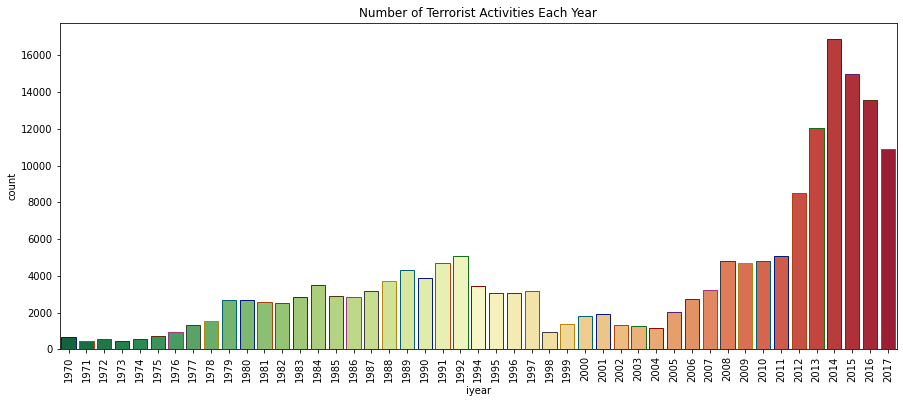

In [ ]:
plot.subplots(figsize=(15,6))
sns.countplot('iyear', data=data, palette='RdYlGn_r', edgecolor=sns.color_palette('dark', 10))
plot.xticks(rotation = 90)
plot.title("Number of Terrorist Activities Each Year")
plot.show()

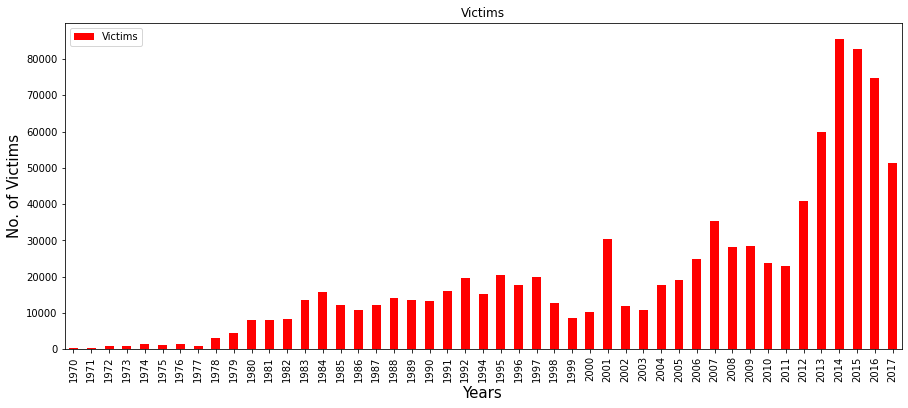

In [ ]:
yearc=data[['iyear','Victims']].groupby('iyear').sum()
yearc.plot(kind='bar',color='red',figsize=(15,6))
plot.title("Victims")
plot.xlabel('Years',fontsize=15)
plot.ylabel('No. of Victims',fontsize=15)
plot.show()

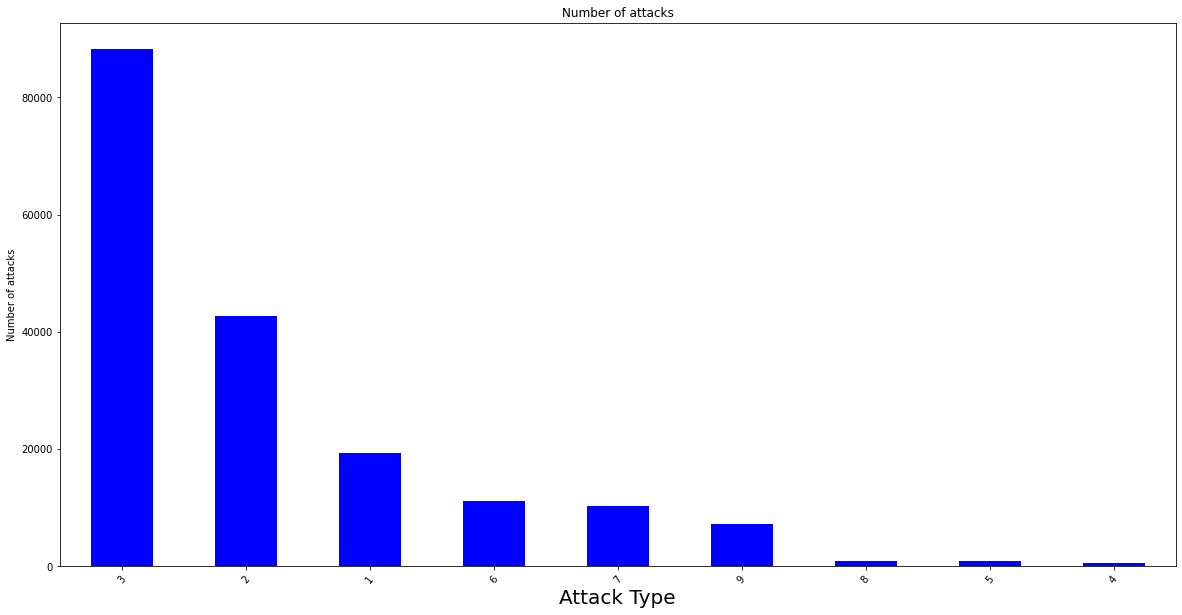

In [ ]:
data['attacktype1'].value_counts().plot(kind='bar',figsize=(20,10),color='blue')
plot.xticks(rotation=50)
plot.xlabel('Attack Type',fontsize=20)
plot.ylabel('Number of attacks')
plot.title('Number of attacks')
plot.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


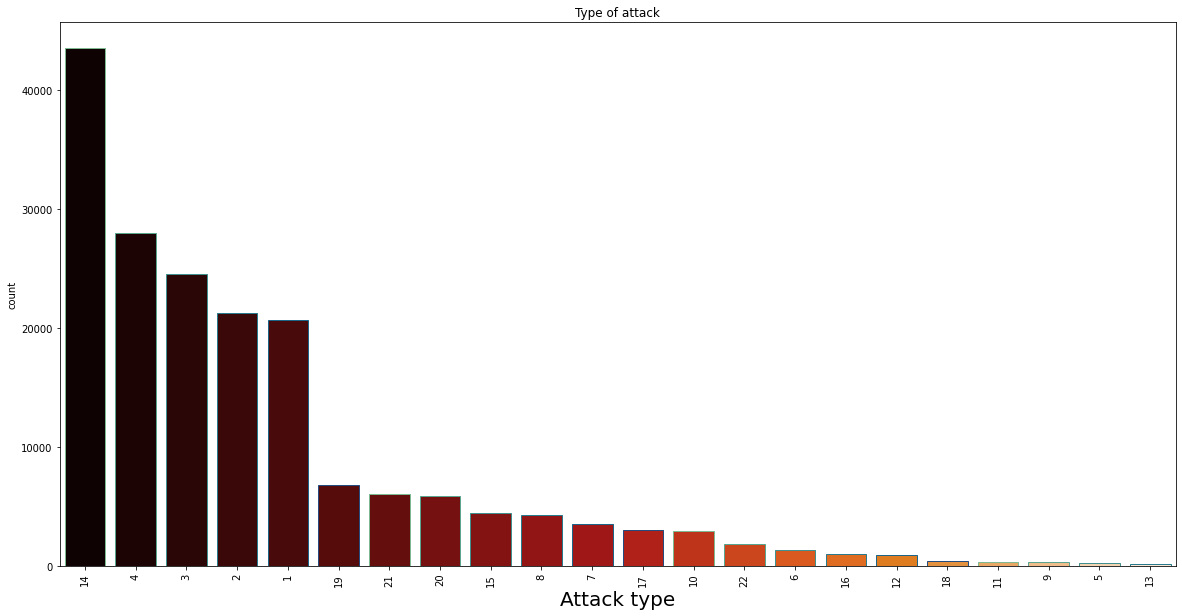

In [ ]:
plot.subplots(figsize=(20,10))
sns.countplot(data['targtype1'],order=data['targtype1'].value_counts().index,palette='gist_heat',edgecolor=sns.color_palette("crest"));
plot.xticks(rotation=90)
plot.xlabel('Attack type',fontsize=20)
plot.ylabel('count')
plot.title('Type of attack')
plot.show()

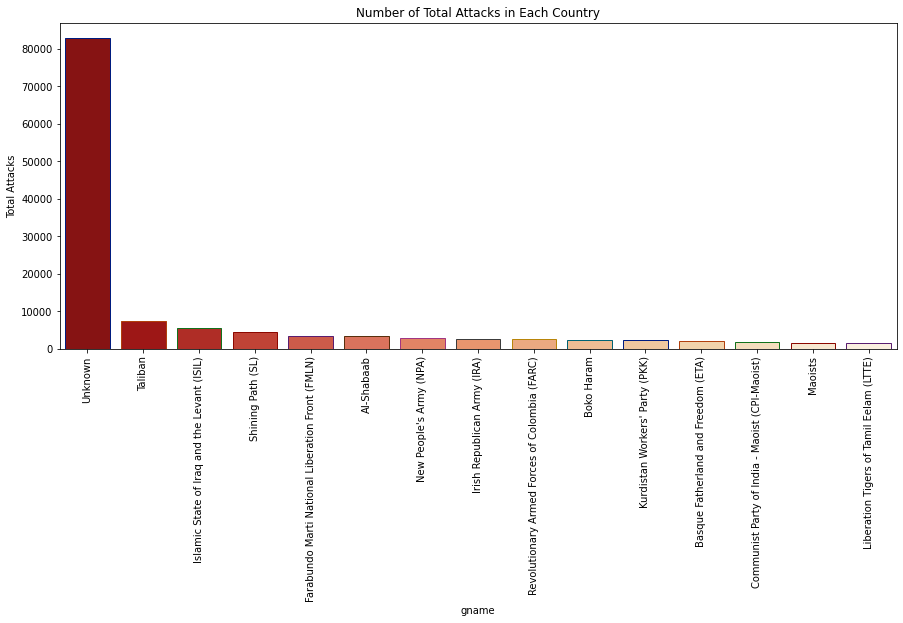

In [ ]:
plot.subplots(figsize=(15,6))
country_attacks = data.gname.value_counts()[:15].reset_index()
country_attacks.columns = ['gname', 'Total Attacks']
sns.barplot(x = country_attacks.gname, y = country_attacks['Total Attacks'], palette='OrRd_r', edgecolor=sns.color_palette('dark', 10))
plot.xticks(rotation = 90)
plot.title("Number of Total Attacks in Each Country")
plot.show()

In [ ]:
success=data.success.value_counts()[:10]
success

1    161632
0     20059
Name: success, dtype: int64

In [ ]:
data.gname.value_counts()[1:11]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: gname, dtype: int64

# Conclusion
## There are 205 Countries from 12 Regions covered in the dataset terrorist attack data in 3 years from 1970 to 2017. Overall 181691 terrorist attacks are recorded here which caused about 935737.0 Casualities Consisted of 411868.0 Kills and 523869.0 Wounded.

### From the Analysis, I have also found that:
### 1. Taliban has done most number of attacks - 7478
### 2. Bombing/Explosion(Attack type - 3) was the most type of attack used.
### 3. Most number of terroist activities indulged in 2014.
### 4. Most number of victims were in 2014.